# Principe



In [1]:
def affichage_debut_partition(T,premier,dernier):
    print(T[premier:dernier-1],T[dernier-1],end=" => ")

def affichage_fin_partition(T,premier,dernier,i):
    print(T[premier:i],T[i],T[i+1:dernier])

In [2]:
TAB = [ 7, 6, 2, 1, 3, 5, 8, 4 ]
print(TAB)

[7, 6, 2, 1, 3, 5, 8, 4]


# Partition

In [3]:
def partition(T,premier,dernier):
    affichage_debut_partition(T,premier,dernier)
    
    pivot = dernier-1

    i = premier-1
    j = pivot

    while True:
        while True:
            i += 1
            if T[pivot] <= T[i]:
                break
        while True:
            j -= 1
            if j < premier or T[j] <= T[pivot]:
                break
        if j < i:
            break
        T[i],T[j] = T[j],T[i]
        
    T[i],T[pivot] = T[pivot],T[i]
        
    affichage_fin_partition(T,premier,dernier,i)

    return i

In [4]:
T = TAB.copy()
pivot = partition(T,0,len(T))

[7, 6, 2, 1, 3, 5, 8] 4 => [3, 1, 2] 4 [7, 5, 8, 6]


In [5]:
p = partition(T,0,pivot)

[3, 1] 2 => [1] 2 [3]


In [6]:
p = partition(T,pivot+1,len(T))

[7, 5, 8] 6 => [5] 6 [8, 7]


# Algorithme récursif

In [7]:
def choix_du_pivot(T,premier,dernier):
    return dernier-1

def tri_rapide_rec(T,premier,dernier):
    if premier < dernier-1:
        pivot = choix_du_pivot(T,premier,dernier);
        T[dernier-1],T[pivot] = T[pivot],T[dernier-1]
    
        pivot = partition(T,premier,dernier)
        tri_rapide_rec(T,premier,pivot)
        tri_rapide_rec(T,pivot+1,dernier)
        
def tri_rapide(T):
    tri_rapide_rec(T,0,len(T))

In [8]:
T = TAB.copy()
tri_rapide(T)

[7, 6, 2, 1, 3, 5, 8] 4 => [3, 1, 2] 4 [7, 5, 8, 6]
[3, 1] 2 => [1] 2 [3]
[7, 5, 8] 6 => [5] 6 [8, 7]
[8] 7 => [] 7 [8]


# Complexité

In [25]:
def tri_rapide_rec_cnt(T,premier,dernier):
    nb_comparaisons = nb_echanges = 0

    if premier < dernier-1:
        pivot = choix_du_pivot(T,premier,dernier);
        T[dernier-1],T[pivot] = T[pivot],T[dernier-1]
        pivot = dernier-1
        
        i = premier-1
        j = pivot

        while True:
            while True:
                i += 1
                nb_comparaisons += 1
                if T[pivot] <= T[i]: 
                    break
            while True:
                j -= 1
                nb_comparaisons += 1
                if j < premier or T[j] <= T[pivot]:
                    break
            if j < i:
                break
            T[i],T[j] = T[j],T[i]; nb_echanges += 1

        T[i],T[pivot] = T[pivot],T[i]; nb_echanges += 1
        
        nc1, ne1 = tri_rapide_rec_cnt(T,premier,i)
        nc2, ne2 = tri_rapide_rec_cnt(T,i+1,dernier)
        
        return nb_comparaisons + nc1 + nc2, nb_echanges + ne1 + ne2
    else:
        return 0,0
        
def tri_rapide_cnt(T):
    return tri_rapide_rec_cnt(T,0,len(T))

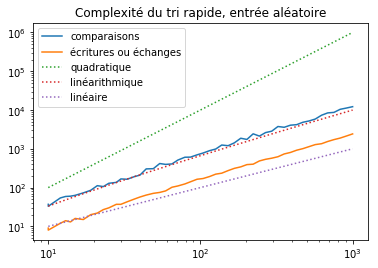

    N |     Comp. |      Ech.
-------------------------------
   10 |        37 |         9
   19 |        85 |        20
   37 |       193 |        51
   71 |       511 |       110
  138 |      1250 |       235
  268 |      2619 |       536
  517 |      5220 |      1137
 1000 |     12186 |      2421


In [26]:
def choix_du_pivot(T,premier,dernier):
    return dernier-1

import include.helpers as hlp  
hlp.evalue_complexite(tri_rapide_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri rapide, entrée aléatoire")

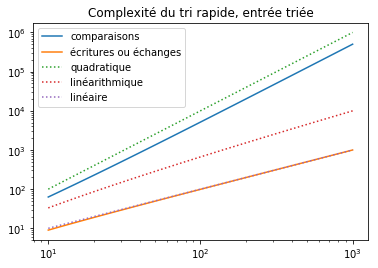

    N |     Comp. |      Ech.
-------------------------------
   10 |        63 |         9
   19 |       207 |        18
   37 |       738 |        36
   71 |      2625 |        70
  138 |      9727 |       137
  268 |     36312 |       267
  517 |    134418 |       516
 1000 |    501498 |       999


In [27]:
def choix_du_pivot(T,premier,dernier):
    return dernier-1

import include.helpers as hlp  
hlp.evalue_complexite(tri_rapide_cnt, 
                      hlp.tableau_trie, 
                      "tri rapide, entrée triée")

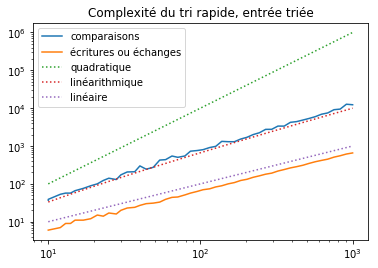

    N |     Comp. |      Ech.
-------------------------------
   10 |        37 |         6
   19 |        89 |        12
   37 |       209 |        24
   71 |       503 |        45
  138 |      1326 |        89
  268 |      2751 |       180
  517 |      5341 |       347
 1000 |     12304 |       656


In [35]:
import numpy as np

def choix_du_pivot(T,premier,dernier):
    return np.random.randint(premier,dernier)
    
import include.helpers as hlp  
hlp.evalue_complexite(tri_rapide_cnt, 
                      hlp.tableau_trie, 
                      "tri rapide, entrée triée")

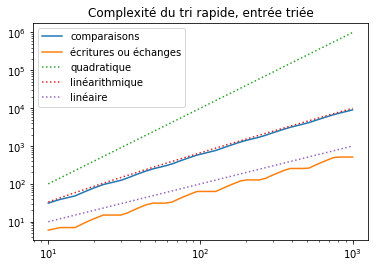

    N |     Comp. |      Ech.
-------------------------------
   10 |        31 |         6
   19 |        72 |        11
   37 |       170 |        21
   71 |       384 |        39
  138 |       867 |        74
  268 |      1922 |       140
  517 |      4162 |       261
 1000 |      9009 |       511


In [43]:
def index_median(T,i1,i2,i3):
    if T[i1] < T[i2] and T[i2] < T[i3]:
        return i2
    elif T[i1] < T[i3] and T[i3] < T[i2]:
        return i3
    else:
        return i1

def choix_du_pivot(T,premier,dernier):
    return index_median(T,premier,dernier-1,premier+(dernier-premier)//2)
    
import include.helpers as hlp  
hlp.evalue_complexite(tri_rapide_cnt, 
                      hlp.tableau_trie, 
                      "tri rapide, entrée triée")